# Logistics

* If you feel lost while working on this notebook (in class or outside or class), don't hesitate to post questions here: https://piazza.com/class/jrzeap5kpirw

# Description of the dataset

The file "Bertrand-physiodata.csv" was captured using the Empatica E4 wristband when Bertrand was teaching a class last Fall. The E4 collects information about a person's heart rate, electrodermal actibity, movements and temperature:

![title](https://support.empatica.com/hc/article_attachments/360000797783/e4_specs.jpg)

the csv file contains the following columns:
* **tags**: users can tag events by pressing a button on the wristband
* **real time**: time of the data collection
* **unix time**: number of seconds since 00:00:00 Thursday, 1 January 1970
* **BVP**: Blood volume pressure (used to compute HR data)
* **HR**: Heart rate data
* **EDA**: Electrodermal activity (i.e., physiological arousal)
* **TEMP**: temperature of the skin
* **ACC_x**: accelerometer data on the x axis
* **ACC_y**: accelerometer data on the y axis
* **ACC_z**: accelerometer data on the z axis

Today we are going to explore Bertrand's physiological response to teaching! :) more specifically, we are going to explore the relationship between heart rate and electrodermal activity. 

# Panda Review

Concepts: 
* head, tail, info, values
* zip, dict, pd.DataFrame
* df.columns
* read_csv, delimiter, header, index



In [1]:
# 1) import the pandas library as pd
import pandas as pd

In [2]:
# 2) import the csv file into a variable called df
df = pd.read_csv("Bertrand-physiodata.csv")

In [3]:
# 3) print the column names, just to make 
# sure that it matches what we have above
df.columns

Index(['tags', 'real time', 'unix time', 'BVP', 'HR', 'EDA', 'TEMP', 'ACC_x',
       'ACC_y', 'ACC_z'],
      dtype='object')

In [4]:
# 4) use the head() function to check your data
df.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
0,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,0.0,33.31,-50.0,7.0,28.0
1,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-41.0,6.0,28.0
3,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-40.0,7.0,25.0


In [5]:
# 5) use the tail() function on your dataframe. How many rows do you have?
df.tail()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
333871,2.0,9/11/18 09:55,1.536674e+09,-2.74,NaN,NaN,NaN,NaN,NaN,NaN
333872,2.0,9/11/18 09:55,1.536674e+09,-2.11,NaN,NaN,NaN,-43.0,15.0,44.0
333873,2.0,9/11/18 09:55,1.536674e+09,-1.64,NaN,NaN,NaN,NaN,NaN,NaN
333874,2.0,9/11/18 09:55,1.536674e+09,-1.48,NaN,NaN,NaN,-42.0,15.0,44.0
333875,NaN,NaN,NaN,-1.66,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 6) use the info() function to inspect your data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333876 entries, 0 to 333875
Data columns (total 10 columns):
tags         333875 non-null float64
real time    333575 non-null object
unix time    333875 non-null float64
BVP          333575 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        166788 non-null float64
ACC_y        166788 non-null float64
ACC_z        166788 non-null float64
dtypes: float64(9), object(1)
memory usage: 25.5+ MB


In [7]:
# 7) knowing that BVP is collected 64 times per second (i.e., 64Hz),
# what can you tell of the sampling frequency of the other measures?
HR_rate = round (5203 / 333575 * 64)
EDA_TEMP_rate = round (20849 / 333575 * 64)
ACC_rate = round (166788 / 333575 * 64)
print(HR_rate,EDA_TEMP_rate,ACC_rate)

1 4 32


# Plotting

Concepts: 
* plot, subplot, line plots, scatter, box plots, hist, ...
* mean, median, quantiles, STD, etc. 
* separate and summarize

In [8]:
# 8) make sure you're plotting your graphs inline
# Hint: https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline
import matplotlib.pyplot as plt

% matplotlib inline

### Let's work on the heart rate (HR) data first

In this section we are going to produce various graphs to inspect Bertrand's heart rate data. 

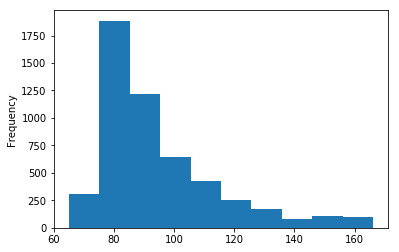

In [9]:
# 9) produce a histogram of the heart rate data; what can you say from it?
df.HR.plot(kind='hist') # Or, df.HR.hist()
plt.show()

[]

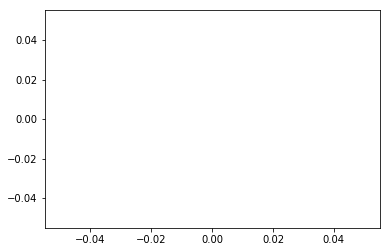

In [10]:
# 10) Try to plot the values over time (e.g., use the real time for the x axis):
plt.plot(x=df["real time"], y=df["HR"])

11) What happened? Come up with 2-3 reasons why this didn't work before you move on to the next question:
- reason 1: Real time is not continuous as it stands
- reason 2: Null values
- reason 3: Different number of values (sampling rate)

After you've anwered the question above, feel free to look at this hint and try to fix your dataframe: https://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings/22553757

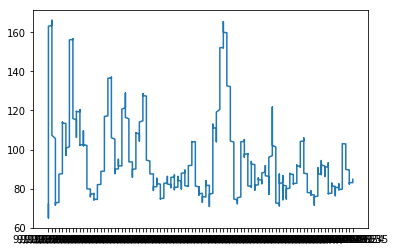

In [11]:
# 12) Fix your dataframe using the link above: 
df_nonull = df.dropna()
plt.plot(df_nonull["real time"], df_nonull["HR"])
plt.show()

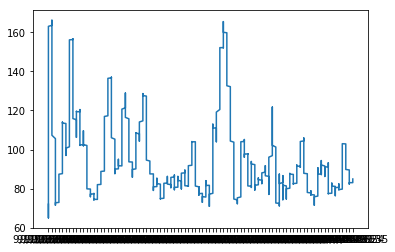

In [12]:
#Or, better,
df_filter = df[df.HR.notnull()]
plt.plot(df_filter["real time"], df_filter["HR"])

### Now let's look at the electrodermal activity data (EDA)

In this section we are going to produce various graphs to inspect Bertrand's electrodermal data. 

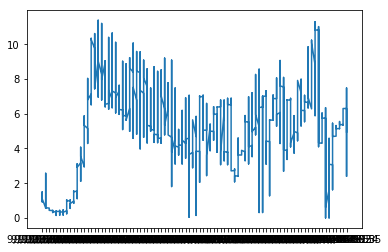

In [13]:
# 13) produce a line plot to visually inspect the EDA data
# Hint: make sure you filter the nonnull data
plt.plot(df_nonull["real time"], df_nonull["EDA"])

In [15]:
# trying to just filterout the NaNs in the columns, insted of the entire dataframe
plt.plot(df["real time"].dropna(),df["EDA"].dropna())
# Note to self: apparently the dimensions differ, so that failed

Feel free to look at the following page to make sense of the units of the EDA data: 
* https://support.empatica.com/hc/en-us/articles/203621955-What-should-I-know-to-use-EDA-data-in-my-experiment-

In [14]:
# 14) we don't have any labels on the x axis! 
# convert the 'real time' column into a real date time
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=3

time_format = '%m/%d/%y %H:%M'
df['real time'] = pd.to_datetime(df['real time'], format=time_format)
df = df.set_index('real time')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333876 entries, 2018-09-11 08:28:00 to NaT
Data columns (total 9 columns):
tags         333875 non-null float64
unix time    333875 non-null float64
BVP          333575 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        166788 non-null float64
ACC_y        166788 non-null float64
ACC_z        166788 non-null float64
dtypes: float64(9)
memory usage: 25.5 MB


mean = 5.18050743853421 
median = 5.320238


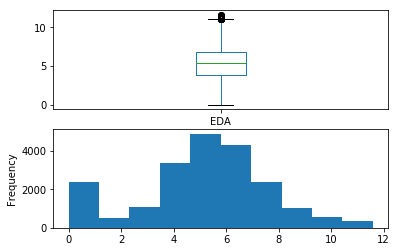

In [15]:
# 15) print the mean and median values of the EDA data; explain how they are different
print("mean =", df.EDA.mean(), "\nmedian =", df.EDA.median())
fig, axes = plt.subplots (nrows=2)
df.EDA.plot(kind='box',ax=axes[0])
df.EDA.plot(kind='hist',ax=axes[1])

As the box plot and histogram reveal, while the box plot revealed some significant outliers at the higher value range, the EDA is mostly normally distributed, apart from a significant amount of very small data (the first bar located to the left of the histogram). It is likely that the high frequency of small data caused the mean to be lower than the median.

In [16]:
# 16) plot a histogram of the EDA values; does that confirm your interpretation above?

# Apartly my problem solving process is ahead of schedule for this notebook.

### Combining EDA and HR data on the same graph

In this section we are going to produce various graphs to inspect both the HR and EDA data.

In [17]:
# 16) Drop null values for both EDA and HR data?
df_notEDA = df[df.EDA.notnull()]
df_notEDAHR = df_notEDA[df_notEDA.HR.notnull()]
df_notEDAHR.info()
df_notEDAHR
# Technically in this case, dropping all null values from HR alone should be sufficient, but just to be safer, I first
# dropped EDA, followed by HR

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5203 entries, 2018-09-11 08:28:00 to 2018-09-11 09:55:00
Data columns (total 9 columns):
tags         5203 non-null float64
unix time    5203 non-null float64
BVP          5203 non-null float64
HR           5203 non-null float64
EDA          5203 non-null float64
TEMP         5202 non-null float64
ACC_x        5203 non-null float64
ACC_y        5203 non-null float64
ACC_z        5203 non-null float64
dtypes: float64(9)
memory usage: 406.5 KB


,tags,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
real time,,,,,,,,,
2018-09-11 08:28:00,0.0,1.536669e+09,-79.05,72.00,1.059777,33.31,-13.0,65.0,-24.0
2018-09-11 08:28:00,0.0,1.536669e+09,218.11,71.50,1.125105,33.31,-35.0,-7.0,34.0
2018-09-11 08:28:00,0.0,1.536669e+09,-20.02,65.00,1.501703,33.31,-40.0,-12.0,34.0
2018-09-11 08:28:00,0.0,1.536669e+09,76.70,92.25,1.204524,33.31,-31.0,13.0,46.0
2018-09-11 08:28:00,0.0,1.536669e+09,71.85,87.60,1.184028,33.31,-38.0,8.0,51.0
2018-09-11 08:28:00,0.0,1.536669e+09,9.11,102.00,1.171219,33.31,-39.0,8.0,49.0
2018-09-11 08:28:00,0.0,1.536669e+09,-12.12,112.29,1.164814,33.34,-36.0,5.0,50.0
2018-09-11 08:28:00,0.0,1.536669e+09,4.94,121.25,1.154567,33.34,-38.0,8.0,50.0
2018-09-11 08:28:00,0.0,1.536669e+09,-3.46,130.00,1.136634,33.39,-38.0,9.0,50.0


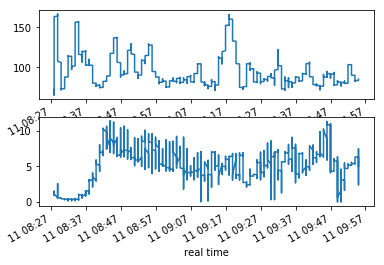

In [18]:
# 18) plot EDA and HR on two different graphs using subplots
# hint: https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
fig, axes = plt.subplots (nrows=2)
df_notEDAHR.HR.plot(ax=axes[0])
df_notEDAHR.EDA.plot(ax=axes[1])

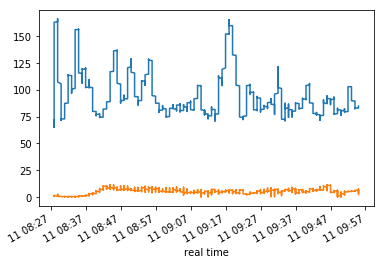

In [19]:
# 19) plot EDA and HR on the same graph; what went wrong?

# Not sure what is meant by same graph, so option 1 two separate line graphs:
df_notEDAHR.HR.plot()
df_notEDAHR.EDA.plot()
plt.show()

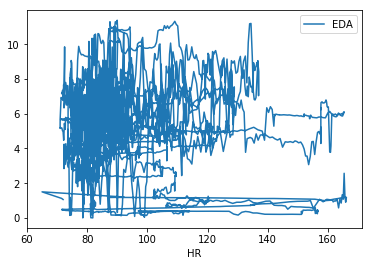

In [20]:
# Option 2 EDA vs HR:
df_notEDAHR.plot(x="HR", y="EDA")
plt.show()

In [32]:
# 20) normalize the HR and EDA columns using your favorite normalization strategy
# Hint: https://stackoverflow.com/questions/12525722/normalize-data-in-pandas
df_notEDAHR["HR_norm"] = (df_notEDAHR.HR - df_notEDA.HR.mean()) / (df_notEDAHR.HR.max() - df_notEDAHR.HR.min())
df_notEDAHR["EDA_norm"] = (df_notEDAHR.EDA - df_notEDA.EDA.mean()) / (df_notEDAHR.EDA.max() - df_notEDAHR.EDA.min())
# Since the assigning copy is very much intentional, the warnings are ignored

/Users/dianafeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dianafeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


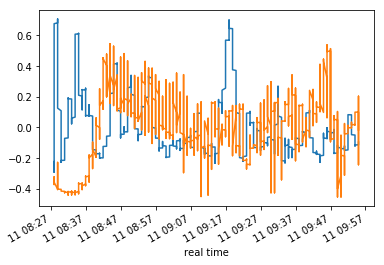

In [30]:
# 21) plot EDA and HR on the same graph; does the result look better?
df_notEDAHR.HR_norm.plot()
df_notEDAHR.EDA_norm.plot()

In [31]:
# 22) what can you observe from the graph? Does there seem to be an agreement between HR and EDA?
# While part of the trend of the EDA data follows HR (~11:08:40 to ~11:09:10), they don't agree all the time

**IN-CLASS DISCUSSION**: why do we normalize values? When do we want to normalize them?

# Time series

Concepts:
* indexing, slicing, datetimeIndex
* resampling, rolling mean
* method chaining and filtering
* plotting time series

In this section, we are going to work with some built-in function of pandas to work with time series. More specifically, we are going to downsample our data and use a rolling window to generate additional graphs.

In [44]:
# let's reimport our data to make sure it's clean
df = pd.read_csv('Bertrand-physiodata.csv')
filtered_df = df[df['EDA'].notnull() & df['EDA'].notnull()].copy()

# make sure that you are converting the real time column into a datetime
filtered_df['real time'] = pd.to_datetime(filtered_df['real time'], format='%d/%m/%y %H:%M')
filtered_df = filtered_df.set_index('real time')

filtered_df.head()
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20849 entries, 2018-11-09 08:28:00 to 2018-11-09 09:55:00
Data columns (total 9 columns):
tags         20849 non-null float64
unix time    20849 non-null float64
BVP          20844 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        20849 non-null float64
ACC_y        20849 non-null float64
ACC_z        20849 non-null float64
dtypes: float64(9)
memory usage: 1.6 MB


### Down sampling

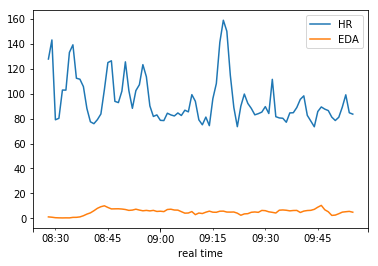

In [45]:
# 23) Use the instruction from datacamp to resample your data in 60 seconds windows and plot the result
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=7
filtered_resample = filtered_df.resample('60s').mean()
filtered_resample.plot(x=None, y= ["HR","EDA"])

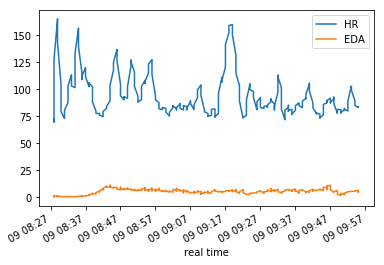

In [46]:
# 24) do the same thing, but this time using the rolling() function in a 60sec window
filtered_rolling = filtered_df.rolling('60s').mean() # or use 'T'
filtered_rolling.plot(x=None, y= ["HR","EDA"])

In [ ]:
# 25) What is the difference between rolling() and resample()? Why do the graphs look different?
# the result of rolling is more jittery than resample, because here rolling always takes the mean of the previous 60s
# of data, so any changes during that peirod is reflected in the rolled value, whereas in resample, the points are
# simply averaged over the range of 60s, so the trend if inherently more smooth

## Correlations

In this section we're going to keep exploring the relationship between heart rate data and electrodermal activity. We are going to do this visually (with a scatter plot first) and then using a statistical test (Pearson's correlation). 

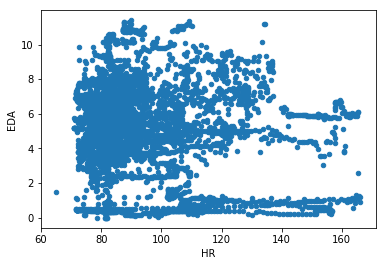

In [43]:
# 26) create a scatter plot between HR and EDA:
filtered_df.plot(kind='scatter', x='HR', y='EDA')

In [58]:
# 27) compute pearson's correlation between the HR and EDA data
filtered_df.HR.corr(filtered_df.EDA)

-0.13861928732609413

In [59]:
# 29) what can you conclude? Is there a linear relationship between HR and EDA data in this dataset?
# This is too weak a correlation to infer any kind of strong relationship between HR and EDA